In [7]:
def stock_additions_segmented (share_segments, raw_vehicle_stock):
    
# This function takes the stock in each year and calculates the stock additions for the period 2016-2060
# Year 2015 is the total initial stock in that year
#Furthermore, it divides the df in segments
    
    #Clean up the df
    
    raw_vehicle_stock = raw_vehicle_stock.iloc[:,7:]
    raw_vehicle_stock = raw_vehicle_stock.reset_index()
    raw_vehicle_stock = raw_vehicle_stock.drop(['index'], axis = 1)
    raw_vehicle_stock.index = ['share']
    
    #Calculate capacity addition per year
    #stock_addition = raw_vehicle_stock.diff(axis = 1)
    #stock_addition[2015] = raw_vehicle_stock[:,202015]
    
    stock_segmented = share_segments.dot(raw_vehicle_stock)
    return(stock_segmented)

In [8]:

def get_share(stock, BEVs, PHEVs, ICEVG, ICEVD):
    BEV_share = BEVs.div(stock)
    PHEV_share = PHEVs.div(stock)
    ICEV_tot = ICEVG + ICEVD
    ICEV_share = ICEV_tot.div(stock)
    frames = [BEV_share,PHEV_share,ICEV_share]
    out = pd.concat(frames)
    out.index = ['BEV','PHEV','ICEV']
    return(out)

In [9]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import math
import pandas as pd
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns


In [10]:
all = pd.read_excel('ODYM_RECC.xls','Model_Results')

## Data from shares of each segment extracted by the ICCT pocketbook 2019/2020. 
## For now I assume a constant share. This will likely be analysed differently

In [11]:
segment = ['A','B','C','D','E','F','J']
share = ['0.08','0.2056','0.2658','0.0679','0.0287', '0.0021','0.3499']
share = np.array(share,dtype=float)
share_df = pd.DataFrame(share,columns=['share'])

#### Get stocks of BEVs, ICEVs, PHEVs and outflows


## Get data for climate policy and socio economic scenarios

## PHEVs

In [12]:
PHEV_stock = all[all['Indicator'].str.contains('final consumption (use phase inflow), Plugin Hybrid Electric Vehicles (PHEV)', regex = False)]

# Baseline LED
PHEV_stock_base_LED = PHEV_stock[PHEV_stock['SocEc scen'].str.contains('LED', regex = False)]
PHEV_stock_base_LED = PHEV_stock_base_LED[PHEV_stock_base_LED['ClimPol scen'].str.contains('Baseline', regex = False)]

#RCP2.6 - LED
PHEV_stock_RCP26_LED = PHEV_stock[PHEV_stock['SocEc scen'].str.contains('LED', regex = False)]
PHEV_stock_RCP26_LED = PHEV_stock_RCP26_LED[PHEV_stock_RCP26_LED['ClimPol scen'].str.contains('RCP2.6', regex = False)]

#Baseline - SSP1
PHEV_stock_base_SSP1 = PHEV_stock[PHEV_stock['SocEc scen'].str.contains('SSP1', regex = False)]
PHEV_stock_base_SSP1 = PHEV_stock_base_SSP1[PHEV_stock_base_SSP1['ClimPol scen'].str.contains('Baseline', regex = False)]

#RCP2.6 - SSP1
PHEV_stock_RCP26_SSP1 = PHEV_stock[PHEV_stock['SocEc scen'].str.contains('SSP1', regex = False)]
PHEV_stock_RCP26_SSP1 = PHEV_stock_RCP26_SSP1[PHEV_stock_RCP26_SSP1['ClimPol scen'].str.contains('RCP2.6', regex = False)]

#RCP2.6 - SSP2
PHEV_stock_RCP26_SSP2 = PHEV_stock[PHEV_stock['SocEc scen'].str.contains('SSP2', regex = False)]
PHEV_stock_RCP26_SSP2 = PHEV_stock_RCP26_SSP2[PHEV_stock_RCP26_SSP2['ClimPol scen'].str.contains('RCP2.6', regex = False)]

#Baseline - SSP2
PHEV_stock = PHEV_stock[PHEV_stock['SocEc scen'].str.contains('SSP2', regex = False)]
PHEV_stock = PHEV_stock[PHEV_stock['ClimPol scen'].str.contains('Baseline', regex = False)]





## Divide stock in segments

In [13]:
share_df

,share
0,0.0800
1,0.2056
2,0.2658
3,0.0679
4,0.0287
5,0.0021
6,0.3499


## Now PHEVs

In [14]:
PHEV_stock = PHEV_stock.iloc[:,7:]
PHEV_stock = PHEV_stock.reset_index()
PHEV_stock = PHEV_stock.drop(['index'], axis=1)
PHEV_stock.index = ['share']

#intermediate = PHEV_stock [2015]
#PHEV_stock = PHEV_stock.diff(axis = 1)
#PHEV_stock [2015] = intermediate

PHEV_segmented = share_df.dot(PHEV_stock)

In [15]:
PHEV_stock_base_LED = PHEV_stock_base_LED.iloc[:,7:]
PHEV_stock_base_LED = PHEV_stock_base_LED.reset_index()
PHEV_stock_base_LED = PHEV_stock_base_LED.drop(['index'], axis=1)
PHEV_stock_base_LED.index = ['share']

#intermediate = PHEV_stock_base_SSP1 [2015]
#PHEV_stock_base_SSP1 = PHEV_stock_base_SSP1.diff(axis = 1)
#PHEV_stock_base_SSP1 [2015] = intermediate

PHEV_stock_segment_base_LED= share_df.dot(PHEV_stock_base_LED)


In [16]:
PHEV_stock_base_SSP1 = PHEV_stock_base_SSP1.iloc[:,7:]
PHEV_stock_base_SSP1 = PHEV_stock_base_SSP1.reset_index()
PHEV_stock_base_SSP1 = PHEV_stock_base_SSP1.drop(['index'], axis=1)
PHEV_stock_base_SSP1.index = ['share']

#intermediate = PHEV_stock_base_SSP1 [2015]
#PHEV_stock_base_SSP1 = PHEV_stock_base_SSP1.diff(axis = 1)
#PHEV_stock_base_SSP1 [2015] = intermediate

PHEV_stock_segment_base_SSP1= share_df.dot(PHEV_stock_base_SSP1)

In [17]:
PHEV_stock_RCP26_SSP1 = PHEV_stock_RCP26_SSP1.iloc[:,7:]
PHEV_stock_RCP26_SSP1 = PHEV_stock_RCP26_SSP1.reset_index()
PHEV_stock_RCP26_SSP1 = PHEV_stock_RCP26_SSP1.drop(['index'], axis=1)
PHEV_stock_RCP26_SSP1.index = ['share']

#intermediate = PHEV_stock_RCP26_SSP1 [2015]
#PHEV_stock_RCP26_SSP1 = PHEV_stock_RCP26_SSP1.diff(axis = 1)
#PHEV_stock_RCP26_SSP1 [2015] = intermediate

PHEV_stock_segment_RCP26_SSP1= share_df.dot(PHEV_stock_RCP26_SSP1)

In [18]:
PHEV_stock_RCP26_LED = PHEV_stock_RCP26_LED.iloc[:,7:]
PHEV_stock_RCP26_LED = PHEV_stock_RCP26_LED.reset_index()
PHEV_stock_RCP26_LED = PHEV_stock_RCP26_LED.drop(['index'], axis=1)
PHEV_stock_RCP26_LED.index = ['share']

#intermediate = PHEV_stock_RCP26_SSP1 [2015]
#PHEV_stock_RCP26_SSP1 = PHEV_stock_RCP26_SSP1.diff(axis = 1)
#PHEV_stock_RCP26_SSP1 [2015] = intermediate

PHEV_stock_segment_RCP26_LED= share_df.dot(PHEV_stock_RCP26_LED)

In [19]:
PHEV_stock_RCP26_SSP2 = PHEV_stock_RCP26_SSP2.iloc[:,7:]
PHEV_stock_RCP26_SSP2 = PHEV_stock_RCP26_SSP2.reset_index()
PHEV_stock_RCP26_SSP2 = PHEV_stock_RCP26_SSP2.drop(['index'], axis=1)
PHEV_stock_RCP26_SSP2.index = ['share']

#intermediate = PHEV_stock_RCP26_SSP2 [2015]
#PHEV_stock_RCP26_SSP2 = PHEV_stock_RCP26_SSP2.diff(axis = 1)
#PHEV_stock_RCP26_SSP2 [2015] = interAmediate

PHEV_stock_segment_RCP26_SSP2 = share_df.dot(PHEV_stock_RCP26_SSP2)

## Reading data with market share of chemistries

In [20]:
chemistries = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'Sheet1', skiprows=24, nrows = 8, usecols = 'B:AV')

In [21]:
chemistries = chemistries.set_index(['chemistry'])
chemistries = chemistries.interpolate(method = 'linear', axis = 1)

In [22]:
chemistries

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,...,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060
chemistry,,,,,,,,,,,,,,,,,,,,,
NCA,0.15,0.150,0.150,0.150,0.150,0.15,0.148,0.146,0.144,0.142,...,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07
NCM 532,0.30,0.264,0.228,0.192,0.156,0.12,0.110,0.100,0.090,0.080,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NCM 622,0.10,0.126,0.152,0.178,0.204,0.23,0.234,0.238,0.242,0.246,...,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16
NCM 811,0.00,0.020,0.040,0.060,0.080,0.10,0.117,0.134,0.151,0.168,...,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30
LFP,0.21,0.208,0.206,0.204,0.202,0.20,0.190,0.180,0.170,0.160,...,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07
NCM 111,0.24,0.232,0.224,0.216,0.208,0.20,0.180,0.160,0.140,0.120,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NCM 955,0.00,0.000,0.000,0.000,0.000,0.00,0.021,0.042,0.063,0.084,...,0.40,0.40,0.40,0.40,0.40,0.40,0.40,0.40,0.40,0.40
Li-S,0.00,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [23]:
col1 = np.array([169/256, 169/ 256, 169/256, 1])
my_map = LinearSegmentedColormap.from_list('paired',colors=[ col1,'xkcd:dull blue','xkcd:asparagus',
                                                           'xkcd:light orange',
                                                            'xkcd:reddish','xkcd:light eggplant','xkcd:sandy','xkcd:burgundy'], N=8)


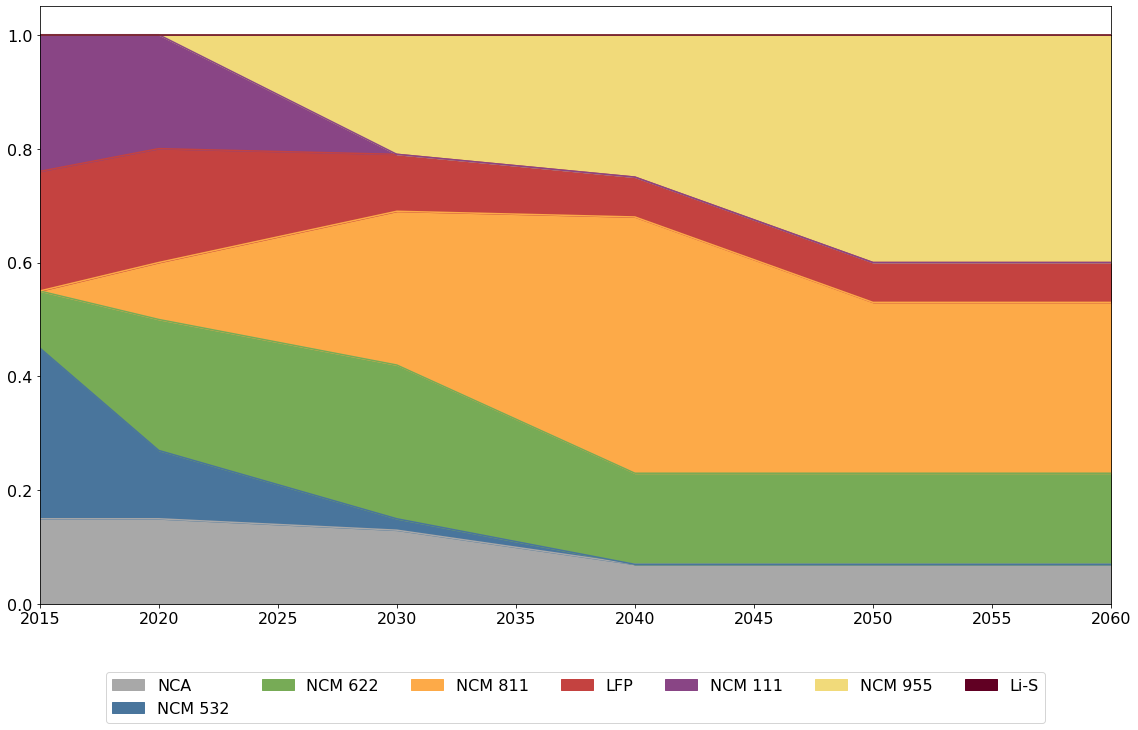

In [24]:
inter = chemistries.transpose()
inter.plot.area(cmap = my_map,figsize =(19.2,11), fontsize = 16)
#plt.legend(bbox_to_anchor = (1,1))
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center',ncol=7, fontsize = 16)
plt.savefig('chemistries.jpeg', pad = 5)

### Read in the battery sizes from the EV database

In [25]:
#batt_size = pd.read_excel('Chemistries_scen1.xlsx', sheet_name = 'BEV_data', skiprows=3, nrows = 11, usecols = 'B:J')
#batt_size = batt_size.set_index("Segment")

batt_size_PHEV = pd.read_excel('Chemistries_scen1.xlsx', sheet_name = 'BEV_data', skiprows=20, nrows = 7, usecols = 'B:C')
batt_size_PHEV = batt_size_PHEV.set_index("Segment")


In [26]:
batt_size_PHEV

,mean
Segment,
A,5
B,10
C,15
D,15
E,15
F,15
J,15


### Try to calculate number of batteries of each chemistry  in each segment.
### Useful dfs --> BEV_stock_segment, chemistries, batt_size

In [27]:
chemistries

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,...,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060
chemistry,,,,,,,,,,,,,,,,,,,,,
NCA,0.15,0.150,0.150,0.150,0.150,0.15,0.148,0.146,0.144,0.142,...,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07
NCM 532,0.30,0.264,0.228,0.192,0.156,0.12,0.110,0.100,0.090,0.080,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NCM 622,0.10,0.126,0.152,0.178,0.204,0.23,0.234,0.238,0.242,0.246,...,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16
NCM 811,0.00,0.020,0.040,0.060,0.080,0.10,0.117,0.134,0.151,0.168,...,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30
LFP,0.21,0.208,0.206,0.204,0.202,0.20,0.190,0.180,0.170,0.160,...,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07
NCM 111,0.24,0.232,0.224,0.216,0.208,0.20,0.180,0.160,0.140,0.120,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NCM 955,0.00,0.000,0.000,0.000,0.000,0.00,0.021,0.042,0.063,0.084,...,0.40,0.40,0.40,0.40,0.40,0.40,0.40,0.40,0.40,0.40
Li-S,0.00,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Reindex dataframes

In [28]:
ind = pd.MultiIndex.from_product([PHEV_segmented.index.to_list(), chemistries.index.to_list()])

### Now, I assign a material content to each battery chemistry
### This will be done in kg/kWh. 




### Next step is to assign a battery size to each segment and calculate the total capacity in the BEVs stock


In [29]:
material = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'Material composition', skiprows=1, nrows = 8, usecols = 'B:M')
material = material.set_index(['chemistry'])

In [30]:
material = material.transpose()

In [31]:
batt_size_PHEV = batt_size_PHEV.reset_index() 

In [32]:
batt_size_PHEV.drop('Segment', inplace = True, axis = 1)

In [33]:
new = pd.MultiIndex.from_product([PHEV_segmented.index.to_list(), chemistries.index.to_list(), material.index.to_list()])

## Do the same for PHEVs

In [34]:
PHEV_stock_segment_RCP26_SSP2 = PHEV_stock_segment_RCP26_SSP2.multiply(1000000)
PHEV_stock_segment_RCP26_SSP1 = PHEV_stock_segment_RCP26_SSP1.multiply(1000000)
PHEV_stock_segment_base_SSP1 = PHEV_stock_segment_base_SSP1.multiply(1000000)
PHEV_segmented = PHEV_segmented.multiply(1000000)

PHEV_stock_segment_RCP26_LED = PHEV_stock_segment_RCP26_LED.multiply(1000000)
PHEV_stock_segment_base_LED = PHEV_stock_segment_base_LED.multiply(1000000)

In [35]:
PHEV_RCP26_SSP2_seg_chem = PHEV_stock_segment_RCP26_SSP2
PHEV_RCP26_SSP1_seg_chem = PHEV_stock_segment_RCP26_SSP1
PHEV_base_SSP1_seg_chem = PHEV_stock_segment_base_SSP1
PHEV_base_SSP2_seg_chem = PHEV_segmented

PHEV_RCP26_LED_seg_chem = PHEV_stock_segment_RCP26_LED
PHEV_base_LED_seg_chem = PHEV_stock_segment_base_LED

In [36]:
PHEV_RCP26_SSP2_seg_chem = PHEV_RCP26_SSP2_seg_chem.reindex(ind, level = 0)
PHEV_RCP26_SSP1_seg_chem = PHEV_RCP26_SSP1_seg_chem.reindex(ind, level = 0)
PHEV_base_SSP1_seg_chem = PHEV_base_SSP1_seg_chem.reindex(ind, level = 0)
PHEV_base_SSP2_seg_chem = PHEV_base_SSP2_seg_chem.reindex(ind, level = 0)

PHEV_RCP26_LED_seg_chem = PHEV_RCP26_LED_seg_chem.reindex(ind, level = 0)
PHEV_base_LED_seg_chem = PHEV_base_LED_seg_chem.reindex(ind, level = 0)

In [37]:
PHEV_RCP26_SSP2_seg_chem = PHEV_RCP26_SSP2_seg_chem.multiply(chemistries, level = 1)
PHEV_RCP26_SSP1_seg_chem = PHEV_RCP26_SSP1_seg_chem.multiply(chemistries, level = 1)
PHEV_base_SSP1_seg_chem = PHEV_base_SSP1_seg_chem.multiply(chemistries, level = 1)
PHEV_base_SSP2_seg_chem = PHEV_base_SSP2_seg_chem.multiply(chemistries, level = 1)

PHEV_RCP26_LED_seg_chem = PHEV_RCP26_LED_seg_chem.multiply(chemistries, level = 1)
PHEV_base_LED_seg_chem = PHEV_base_LED_seg_chem.multiply(chemistries, level = 1)

In [38]:
PHEV_RCP26_SSP2_seg_chem_mat = PHEV_RCP26_SSP2_seg_chem.reindex(new)
PHEV_RCP26_SSP1_seg_chem_mat = PHEV_RCP26_SSP1_seg_chem.reindex(new)
PHEV_base_SSP1_seg_chem_mat = PHEV_base_SSP1_seg_chem.reindex(new)
PHEV_base_SSP2_seg_chem_mat = PHEV_base_SSP2_seg_chem.reindex(new)

PHEV_RCP26_LED_seg_chem_mat = PHEV_RCP26_LED_seg_chem.reindex(new)
PHEV_base_LED_seg_chem_mat = PHEV_base_LED_seg_chem.reindex(new)

## Now, we move on to the calculation of yearly capacity and material additions   

In [39]:
batt_size_PHEV

,mean
0,5
1,10
2,15
3,15
4,15
5,15
6,15


In [40]:
years = PHEV_base_SSP2_seg_chem.columns

In [41]:
material = material.transpose()
material = material.stack()
material = material.to_frame()
material.index.names = ['','']
material.columns = ['']

In [42]:
material

NCA     Li        0.110026
        Co        0.135000
        Ni        0.700000
        Mn        0.000000
        Cu        0.743417
        Al        0.397902
        Graphite  0.985314
        Al_pack   0.304030
        Steel     0.405383
        Cu_pack   0.081947
        Plastics  0.375456
NCM 532 Li        0.145654
        Co        0.230000
        Ni        0.480000
        Mn        0.360000
        Cu        0.800534
        Al        0.416299
        Graphite  0.985015
        Al_pack   0.304030
        Steel     0.405383
        Cu_pack   0.081947
        Plastics  0.375456
NCM 622 Li        0.131165
        Co        0.195000
        Ni        0.620000
        Mn        0.195000
        Cu        0.738353
        Al        0.383813
        Graphite  0.966156
        Al_pack   0.304030
...                    ...
NCM 111 Mn        0.367000
        Cu        0.801000
        Al        0.416000
        Graphite  0.985000
        Al_pack   0.304030
        Steel     0.405383
        Cu_pack   0.081947
        Plastics  0.375456
NCM 955 Li        0.106472
        Co        0.047952
        Ni        0.863130
        Mn        0.047952
        Cu        0.750084
        Al        0.393131
        Graphite  0.984087
        Al_pack   0.304030
        Steel     0.405383
        Cu_pack   0.081947
        Plastics  0.375456
Li-S    Li        1.000000
        Co        0.000000
        Ni        0.000000
        Mn        0.000000
        Cu        0.750084
        Al        0.393131
        Graphite  0.984087
        Al_pack   0.304030
        Steel     0.405383
        Cu_pack   0.081947
        Plastics  0.375456

[88 rows x 1 columns]

In [43]:
rep = pd.concat([material]*(len(chemistries.index)-1))
rep.index = new
rep.columns = ['mean']
rep

mean
0 NCA     Li        0.110026
          Co        0.135000
          Ni        0.700000
          Mn        0.000000
          Cu        0.743417
          Al        0.397902
          Graphite  0.985314
          Al_pack   0.304030
          Steel     0.405383
          Cu_pack   0.081947
          Plastics  0.375456
  NCM 532 Li        0.145654
          Co        0.230000
          Ni        0.480000
          Mn        0.360000
          Cu        0.800534
          Al        0.416299
          Graphite  0.985015
          Al_pack   0.304030
          Steel     0.405383
          Cu_pack   0.081947
          Plastics  0.375456
  NCM 622 Li        0.131165
          Co        0.195000
          Ni        0.620000
          Mn        0.195000
          Cu        0.738353
          Al        0.383813
          Graphite  0.966156
          Al_pack   0.304030
...                      ...
6 NCM 111 Mn        0.367000
          Cu        0.801000
          Al        0.416000
          Graphite  0.985000
          Al_pack   0.304030
          Steel     0.405383
          Cu_pack   0.081947
          Plastics  0.375456
  NCM 955 Li        0.106472
          Co        0.047952
          Ni        0.863130
          Mn        0.047952
          Cu        0.750084
          Al        0.393131
          Graphite  0.984087
          Al_pack   0.304030
          Steel     0.405383
          Cu_pack   0.081947
          Plastics  0.375456
  Li-S    Li        1.000000
          Co        0.000000
          Ni        0.000000
          Mn        0.000000
          Cu        0.750084
          Al        0.393131
          Graphite  0.984087
          Al_pack   0.304030
          Steel     0.405383
          Cu_pack   0.081947
          Plastics  0.375456

[616 rows x 1 columns]

In [44]:
rep

mean
0 NCA     Li        0.110026
          Co        0.135000
          Ni        0.700000
          Mn        0.000000
          Cu        0.743417
          Al        0.397902
          Graphite  0.985314
          Al_pack   0.304030
          Steel     0.405383
          Cu_pack   0.081947
          Plastics  0.375456
  NCM 532 Li        0.145654
          Co        0.230000
          Ni        0.480000
          Mn        0.360000
          Cu        0.800534
          Al        0.416299
          Graphite  0.985015
          Al_pack   0.304030
          Steel     0.405383
          Cu_pack   0.081947
          Plastics  0.375456
  NCM 622 Li        0.131165
          Co        0.195000
          Ni        0.620000
          Mn        0.195000
          Cu        0.738353
          Al        0.383813
          Graphite  0.966156
          Al_pack   0.304030
...                      ...
6 NCM 111 Mn        0.367000
          Cu        0.801000
          Al        0.416000
          Graphite  0.985000
          Al_pack   0.304030
          Steel     0.405383
          Cu_pack   0.081947
          Plastics  0.375456
  NCM 955 Li        0.106472
          Co        0.047952
          Ni        0.863130
          Mn        0.047952
          Cu        0.750084
          Al        0.393131
          Graphite  0.984087
          Al_pack   0.304030
          Steel     0.405383
          Cu_pack   0.081947
          Plastics  0.375456
  Li-S    Li        1.000000
          Co        0.000000
          Ni        0.000000
          Mn        0.000000
          Cu        0.750084
          Al        0.393131
          Graphite  0.984087
          Al_pack   0.304030
          Steel     0.405383
          Cu_pack   0.081947
          Plastics  0.375456

[616 rows x 1 columns]

In [45]:
total_capacity = batt_size_PHEV.reindex(ind, level = 0)
total_material = batt_size_PHEV.reindex(new, level=0).mul(rep)

## Calculate yearly addition of battery capacity. Units: kWh

### BEVs

### PHEVs

In [46]:
PHEV_cap_RCP26_SSP1 =  total_capacity.values * PHEV_RCP26_SSP1_seg_chem

PHEV_cap_RCP26_SSP2 = total_capacity.values * PHEV_RCP26_SSP2_seg_chem

PHEV_cap_base_SSP1 = total_capacity.values * PHEV_base_SSP1_seg_chem

PHEV_cap_base_SSP2 = total_capacity.values * PHEV_base_SSP2_seg_chem


PHEV_cap_RCP26_LED = total_capacity.values * PHEV_RCP26_LED_seg_chem

PHEV_cap_base_LED = total_capacity.values * PHEV_base_LED_seg_chem



In [47]:
PHEV_cap_RCP26_SSP1 = PHEV_cap_RCP26_SSP1.reset_index()
PHEV_cap_RCP26_SSP1 = PHEV_cap_RCP26_SSP1.rename(columns={'level_0': 'segment', 'level_1': 'chemistry' }) 
PHEV_cap_RCP26_SSP1 = PHEV_cap_RCP26_SSP1.set_index(['segment','chemistry'])

PHEV_cap_RCP26_SSP2 = PHEV_cap_RCP26_SSP2.reset_index()
PHEV_cap_RCP26_SSP2 = PHEV_cap_RCP26_SSP2.rename(columns={'level_0': 'segment', 'level_1': 'chemistry' }) 
PHEV_cap_RCP26_SSP2 = PHEV_cap_RCP26_SSP2.set_index(['segment','chemistry'])


PHEV_cap_base_SSP1 = PHEV_cap_base_SSP1.reset_index()
PHEV_cap_base_SSP1 = PHEV_cap_base_SSP1.rename(columns={'level_0': 'segment', 'level_1': 'chemistry' }) 
PHEV_cap_base_SSP1 = PHEV_cap_base_SSP1.set_index(['segment','chemistry'])

PHEV_cap_base_SSP2 = PHEV_cap_base_SSP2.reset_index()
PHEV_cap_base_SSP2 = PHEV_cap_base_SSP2.rename(columns={'level_0': 'segment', 'level_1': 'chemistry' }) 
PHEV_cap_base_SSP2 = PHEV_cap_base_SSP2.set_index(['segment','chemistry'])

PHEV_cap_RCP26_LED = PHEV_cap_RCP26_LED.reset_index()
PHEV_cap_RCP26_LED = PHEV_cap_RCP26_LED.rename(columns={'level_0': 'segment', 'level_1': 'chemistry' }) 
PHEV_cap_RCP26_LED = PHEV_cap_RCP26_LED.set_index(['segment','chemistry'])


PHEV_cap_base_LED = PHEV_cap_base_LED.reset_index()
PHEV_cap_base_LED = PHEV_cap_base_LED.rename(columns={'level_0': 'segment', 'level_1': 'chemistry' }) 
PHEV_cap_base_LED = PHEV_cap_base_LED.set_index(['segment','chemistry'])


## Calculate stock additions of materials at any given year, for each segment and chemistry

### PHEVs

In [48]:
stock_PHEV_base_SSP2 = total_material.values * PHEV_base_SSP2_seg_chem_mat

stock_PHEV_base_SSP1 = total_material.values * PHEV_base_SSP1_seg_chem_mat 

stock_PHEV_RCP26_SSP2 = total_material.values * PHEV_RCP26_SSP2_seg_chem_mat

stock_PHEV_RCP26_SSP1 = total_material.values * PHEV_RCP26_SSP1_seg_chem_mat 

stock_PHEV_base_LED = total_material.values * PHEV_base_LED_seg_chem_mat 

stock_PHEV_RCP26_LED = total_material.values * PHEV_RCP26_LED_seg_chem_mat


In [49]:
stock_PHEV_RCP26_SSP1 = stock_PHEV_RCP26_SSP1.reset_index()
stock_PHEV_RCP26_SSP1 = stock_PHEV_RCP26_SSP1.rename(columns={'level_0': 'segment', 'level_1': 'chemistry', 'level_2': 'material' }) 
stock_PHEV_RCP26_SSP1 = stock_PHEV_RCP26_SSP1.set_index(['segment','chemistry','material'])

stock_PHEV_RCP26_SSP2 = stock_PHEV_RCP26_SSP2.reset_index()
stock_PHEV_RCP26_SSP2 = stock_PHEV_RCP26_SSP2.rename(columns={'level_0': 'segment', 'level_1': 'chemistry', 'level_2': 'material' }) 
stock_PHEV_RCP26_SSP2 = stock_PHEV_RCP26_SSP2.set_index(['segment','chemistry','material'])

stock_PHEV_base_SSP1 = stock_PHEV_base_SSP1.reset_index()
stock_PHEV_base_SSP1 = stock_PHEV_base_SSP1.rename(columns={'level_0': 'segment', 'level_1': 'chemistry', 'level_2': 'material' })
stock_PHEV_base_SSP1 = stock_PHEV_base_SSP1.set_index(['segment','chemistry','material'])

stock_PHEV_base_SSP2 = stock_PHEV_base_SSP2.reset_index()
stock_PHEV_base_SSP2 = stock_PHEV_base_SSP2.rename(columns={'level_0': 'segment', 'level_1': 'chemistry', 'level_2': 'material' })
stock_PHEV_base_SSP2 = stock_PHEV_base_SSP2.set_index(['segment','chemistry','material'])



stock_PHEV_RCP26_LED = stock_PHEV_RCP26_LED.reset_index()
stock_PHEV_RCP26_LED = stock_PHEV_RCP26_LED.rename(columns={'level_0': 'segment', 'level_1': 'chemistry', 'level_2': 'material' }) 
stock_PHEV_RCP26_LED = stock_PHEV_RCP26_LED.set_index(['segment','chemistry','material'])

stock_PHEV_base_LED = stock_PHEV_base_LED.reset_index()
stock_PHEV_base_LED = stock_PHEV_base_LED.rename(columns={'level_0': 'segment', 'level_1': 'chemistry', 'level_2': 'material' })
stock_PHEV_base_LED = stock_PHEV_base_LED.set_index(['segment','chemistry','material'])

In [51]:
stock_PHEV_RCP26_SSP1.to_pickle('stock_PHEV_RCP26_SSP1.pkl')
stock_PHEV_RCP26_SSP2.to_pickle('stock_PHEV_RCP26_SSP2.pkl')
stock_PHEV_base_SSP1.to_pickle('stock_PHEV_base_SSP1.pkl')
stock_PHEV_base_SSP2.to_pickle('stock_PHEV_base_SSP2.pkl')

stock_PHEV_RCP26_LED.to_pickle('stock_PHEV_RCP26_LED.pkl')
stock_PHEV_base_LED.to_pickle('stock_PHEV_base_LED.pkl')

PHEV_cap_RCP26_SSP1.to_pickle('PHEV_cap_RCP26_SSP1.pkl')
PHEV_cap_RCP26_SSP2.to_pickle('PHEV_cap_RCP26_SSP2.pkl')
PHEV_cap_base_SSP1.to_pickle('PHEV_cap_base_SSP1.pkl')
PHEV_cap_base_SSP2.to_pickle('PHEV_cap_base_SSP2.pkl')

PHEV_cap_RCP26_LED.to_pickle('PHEV_cap_RCP26_LED.pkl')
PHEV_cap_base_LED.to_pickle('PHEV_cap_base_LED.pkl')

## Export data to Excel for visualization

## PHEVs

#### Export material stock

writer = pd.ExcelWriter('PHEV_Material_Stock.xlsx', engine='xlsxwriter')

#Write each dataframe to a different worksheet.
stock_PHEV_base_SSP2.divide(1e9).groupby(['material']).sum().to_excel(writer, sheet_name='base_SSP2')
stock_PHEV_base_SSP1.divide(1e9).groupby(['material']).sum().to_excel(writer, sheet_name='base_SSP1')
stock_PHEV_RCP26_SSP2.divide(1e9).groupby(['material']).sum().to_excel(writer, sheet_name='RCP26_SSP2')
stock_PHEV_RCP26_SSP1.divide(1e9).groupby(['material']).sum().to_excel(writer, sheet_name='RCP26_SSP1')
#Close the Pandas Excel writer and output the Excel file.
writer.save()

#### Export capacity installed

writer = pd.ExcelWriter('PHEV_Installed_Capacity.xlsx', engine='xlsxwriter')

#Write each dataframe to a different worksheet.
PHEV_cap_base_SSP2.divide(1e6).to_excel(writer, sheet_name='base_SSP2')
PHEV_cap_base_SSP1.divide(1e6).to_excel(writer, sheet_name='base_SSP1')
PHEV_cap_RCP26_SSP2.divide(1e6).to_excel(writer, sheet_name='RCP26_SSP2')
PHEV_cap_RCP26_SSP1.divide(1e6).to_excel(writer, sheet_name='RCP26_SSP1')

#Close the Pandas Excel writer and output the Excel file.
writer.save()